#### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

#### Importing data

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Documents\Post Graduation\data sets\DSData-master\happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Dropping country data and Happiness rank because the data is going to be unique for every column

In [3]:
data = data.drop(columns = ['Country','Happiness Rank'])
data.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Using Binary Encoder for the categorical data in Region so imporing necessary document

In [4]:
### first finding null values
data.info()

### There are no missing values found on dataset, it contains 158 rows and 10 columns including the target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
Region                           158 non-null object
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), object(1)
memory usage: 12.4+ KB


In [5]:
data.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()
be_data = be.fit_transform(data['Region'])
data =  data.join(be_data)

In [7]:
data = data.drop(columns = 'Region')

#### Checing for correlation between the Features ana Target variables 

In [8]:
var_cor = data.corr()
var_cor['Happiness Score'].sort_values(ascending = False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Region_2                         0.174955
Region_3                         0.003393
Region_4                         0.002082
Standard Error                  -0.177254
Region_1                        -0.598725
Region_0                              NaN
Name: Happiness Score, dtype: float64

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


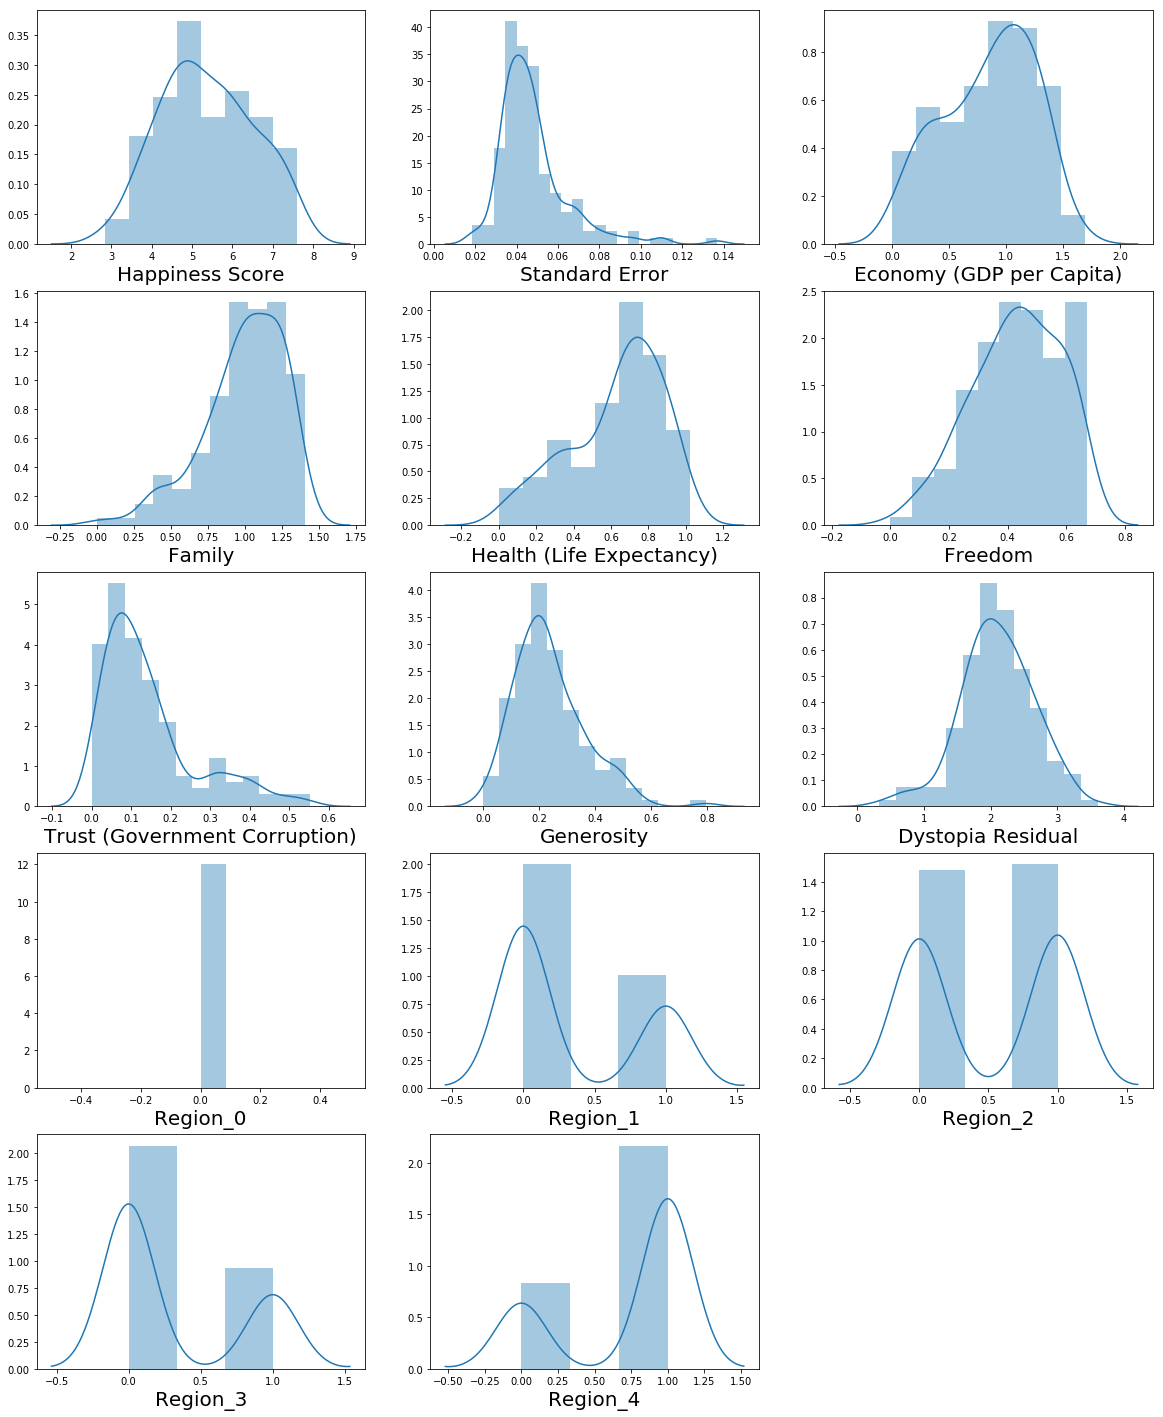

In [9]:
plt.figure(figsize =(20,25), facecolor='white')
plot_number = 1

for column in data:
    if plot_number < 15:
        ax = plt.subplot(5,3,plot_number)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plot_number+=1
plt.show()

#### Upon review, I see that the columns like standard error, Economy, family, health and trust have skewness. However we do not know the amount of skewness hence, i'm using .skew method()

In [10]:
data.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Region_0                         0.000000
Region_1                         0.703760
Region_2                        -0.025562
Region_3                         0.828884
Region_4                        -0.997868
dtype: float64

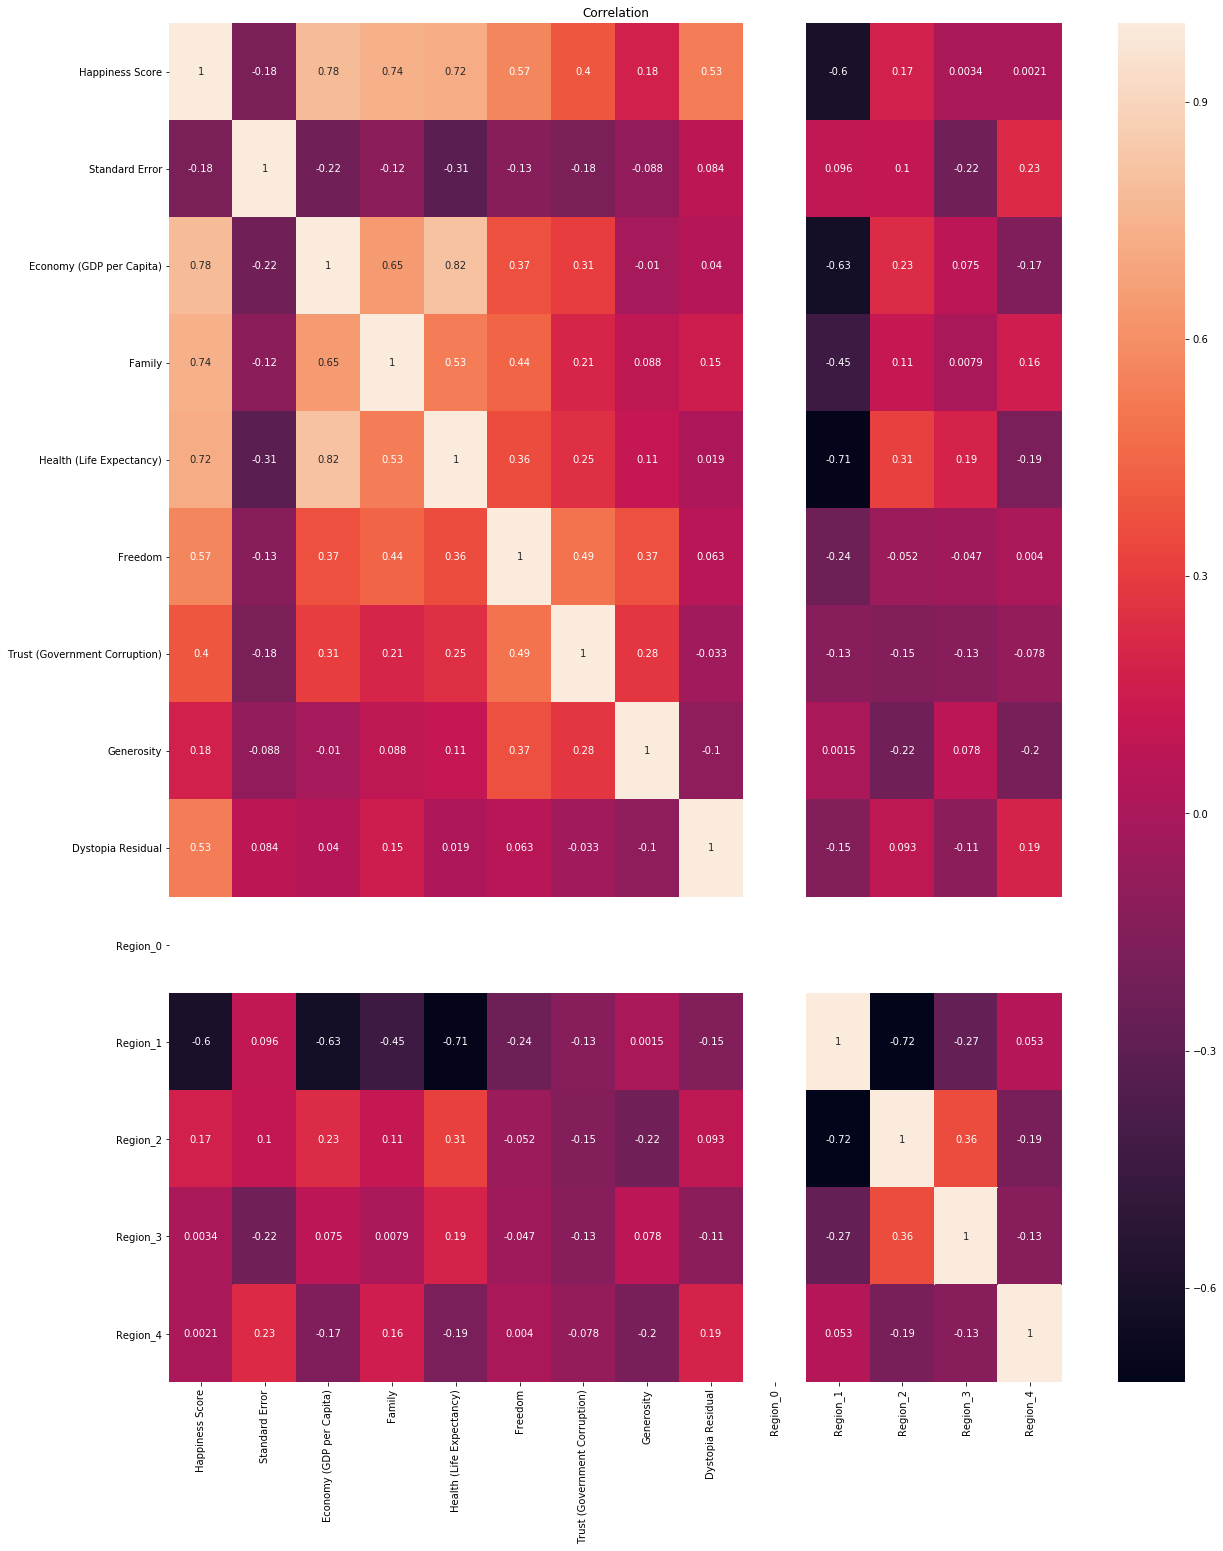

In [11]:
### CHecking for Multi Collinearity
data.corr()
plt.figure(figsize = (20,25))
sns.heatmap(var_cor,annot = True)
plt.title('Correlation')
plt.show()

#### dropping Region_0 because they show multi-collinearity. And as per relation with target variable health is lesser

In [12]:
##['Region_0','Health (Life Expectancy)'] I actually dropped this column health and built a model and got 0.2 RMSE and When I didn't drop the RMSE was lower
data = data.drop(columns = 'Region_0')

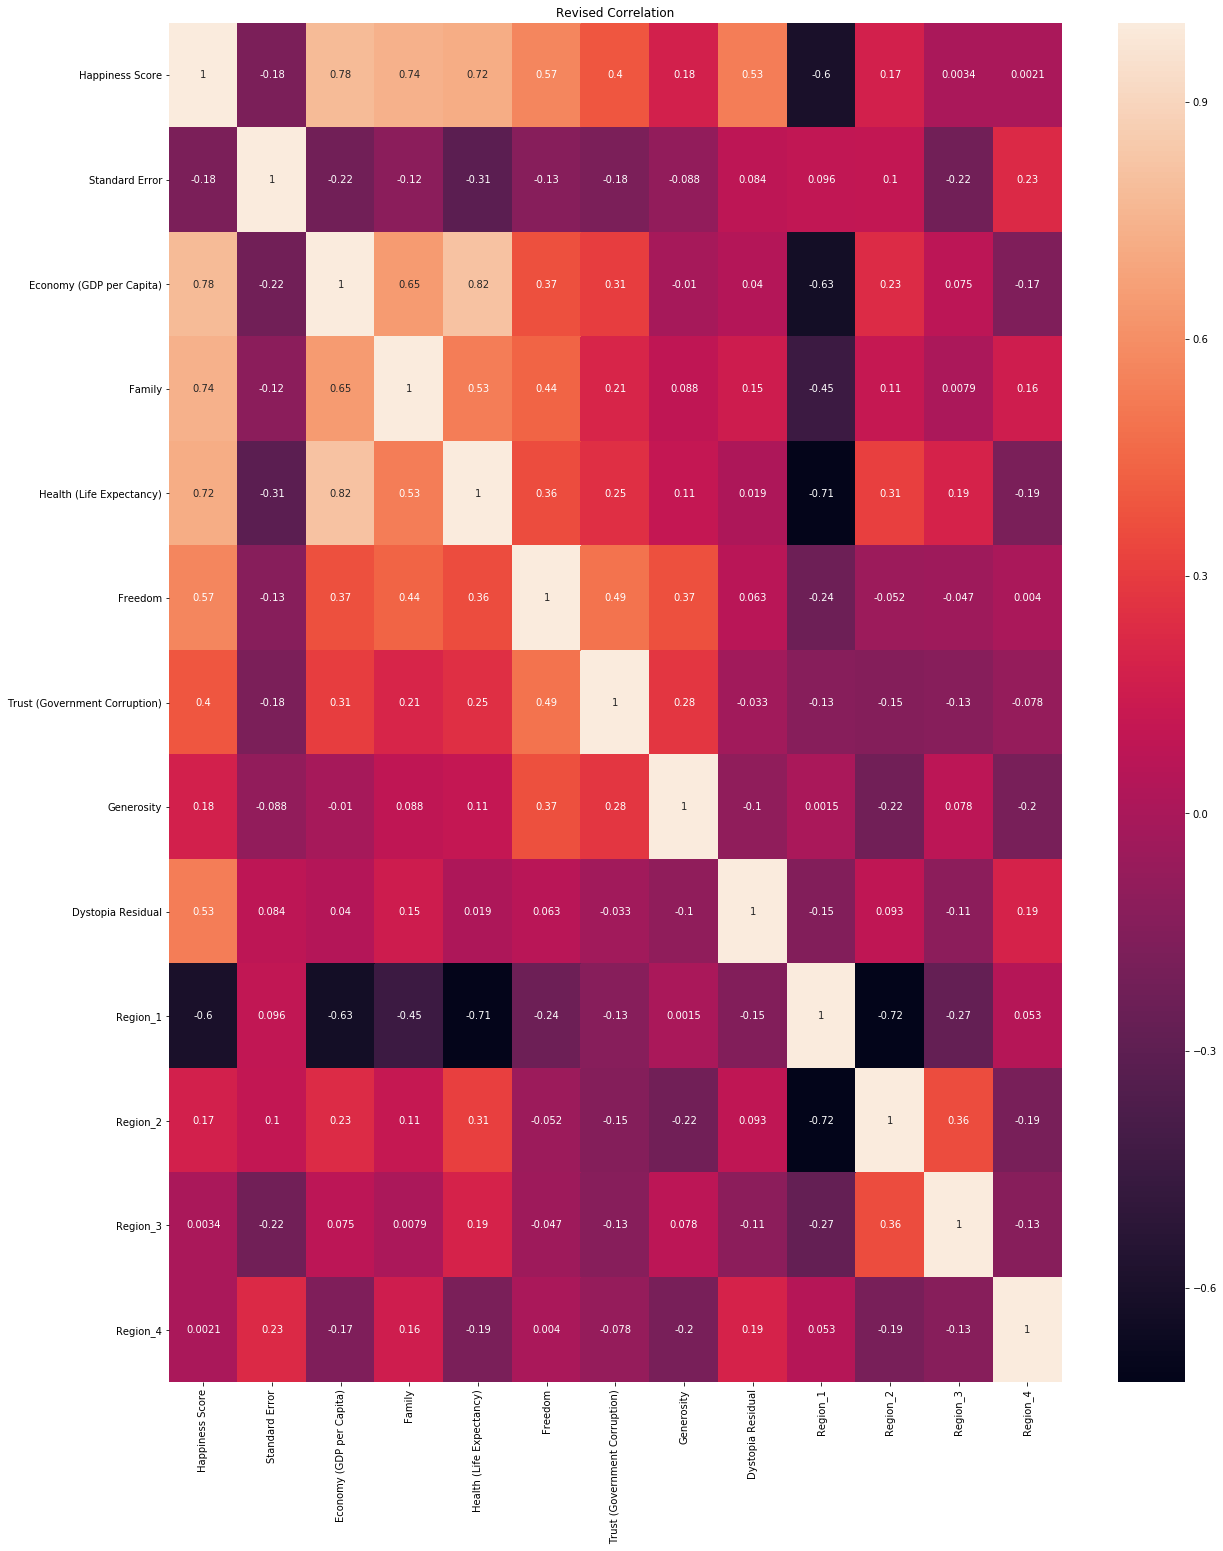

In [13]:
var_cor1 = data.corr()

plt.figure(figsize=(20,25))
sns.heatmap(var_cor1, annot = True)
plt.title('Revised Correlation')
plt.show()

### I'm not dropping the correlated data related to the 1st column in heatmap becase its relation with the target variable and now the data is free of multi collinearity

#### Taking care of skewness in data by applying power transformation to all continuous data

In [14]:
data.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Region_1                         0.703760
Region_2                        -0.025562
Region_3                         0.828884
Region_4                        -0.997868
dtype: float64

In [15]:
df_transform = data.drop(columns = ['Happiness Score','Region_1','Region_2','Region_3','Region_4','Economy (GDP per Capita)',
                                   'Freedom','Dystopia Residual','Health (Life Expectancy)'])

In [16]:
df_join = data.drop(columns = ['Standard Error','Family','Trust (Government Corruption)','Generosity'])

In [17]:
## importing library
from sklearn.preprocessing import power_transform
df_tr = power_transform(df_transform, method ='yeo-johnson')
df_tr = pd.DataFrame(df_tr, columns = df_transform.columns)

In [18]:
data1 = df_tr.join(df_join)

In [19]:
data1.skew()

Standard Error                  -0.020092
Family                          -0.169651
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Dystopia Residual               -0.238911
Region_1                         0.703760
Region_2                        -0.025562
Region_3                         0.828884
Region_4                        -0.997868
dtype: float64

In [20]:
data1.shape

(158, 13)

#### Now that we have reduced te skewness Let's visualize the beauties(features)

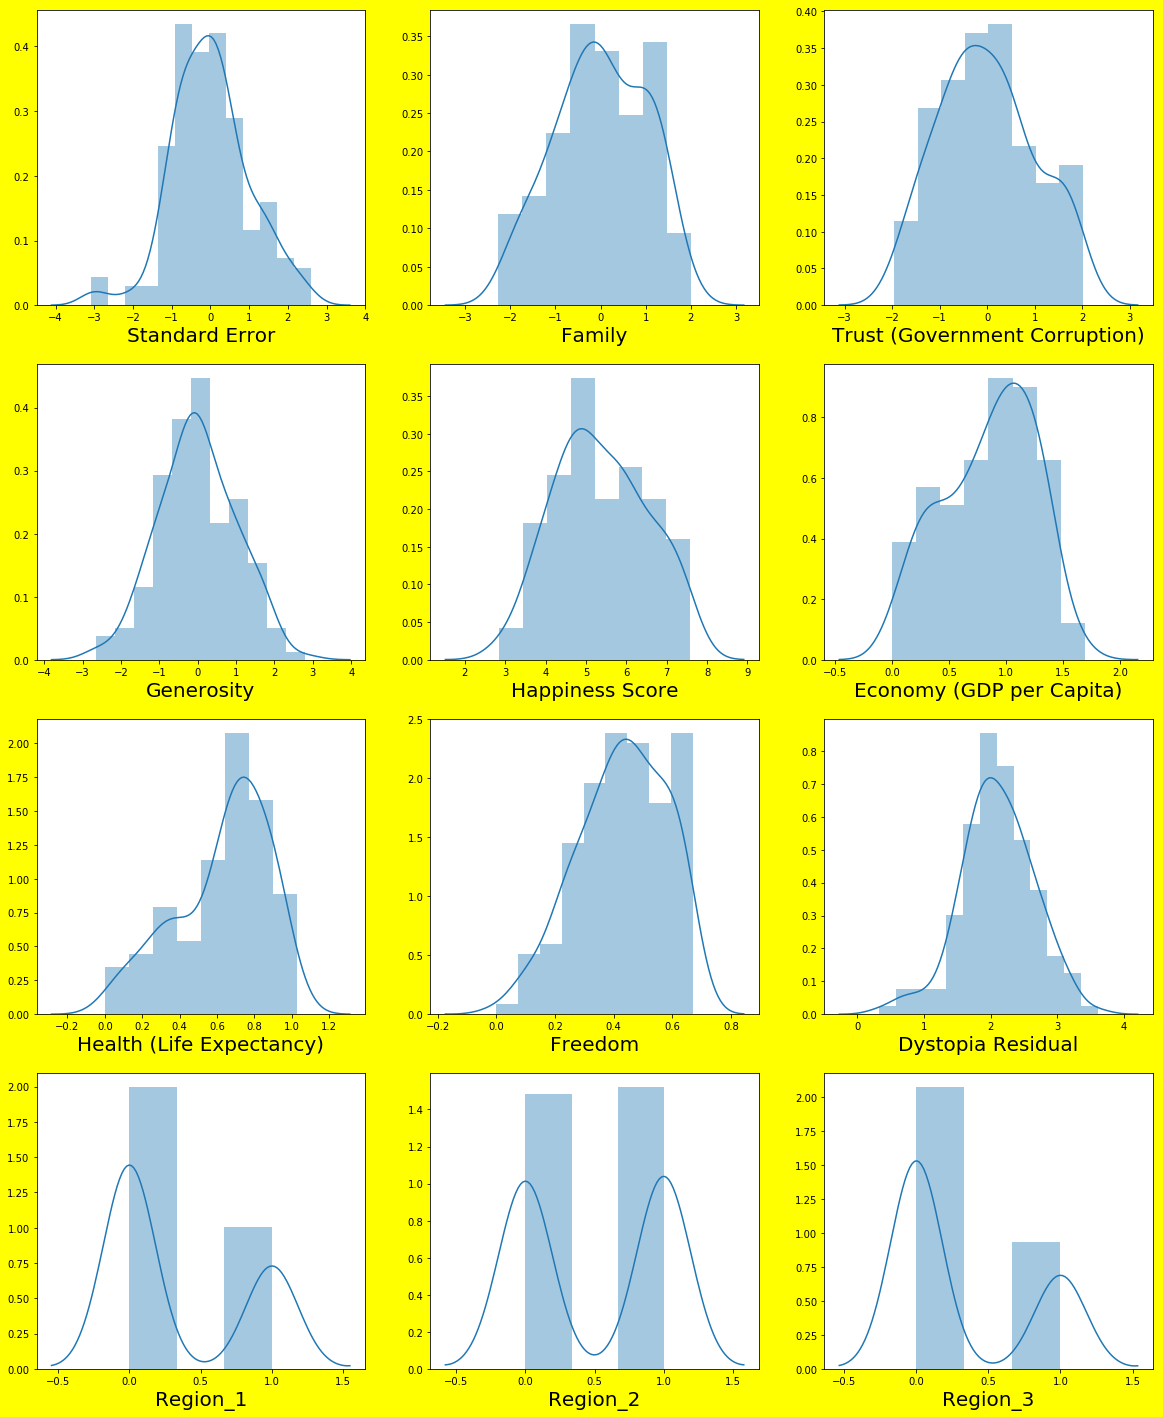

In [21]:
plt.figure(figsize=(20,25),facecolor = 'yellow')
plot_number  = 1

for i in data1:
    if plot_number < 13:
        axis = plt.subplot(4,3,plot_number)
        sns.distplot(data1[i])
        plt.xlabel(i, fontsize = 20)
    plot_number+=1
plt.show()

#### The data is almost cleaned, we'll check for outliers now, we are using box plot for the same. Before which we can split the data

In [22]:
x = data1.drop(columns = 'Happiness Score')
y = data1['Happiness Score']

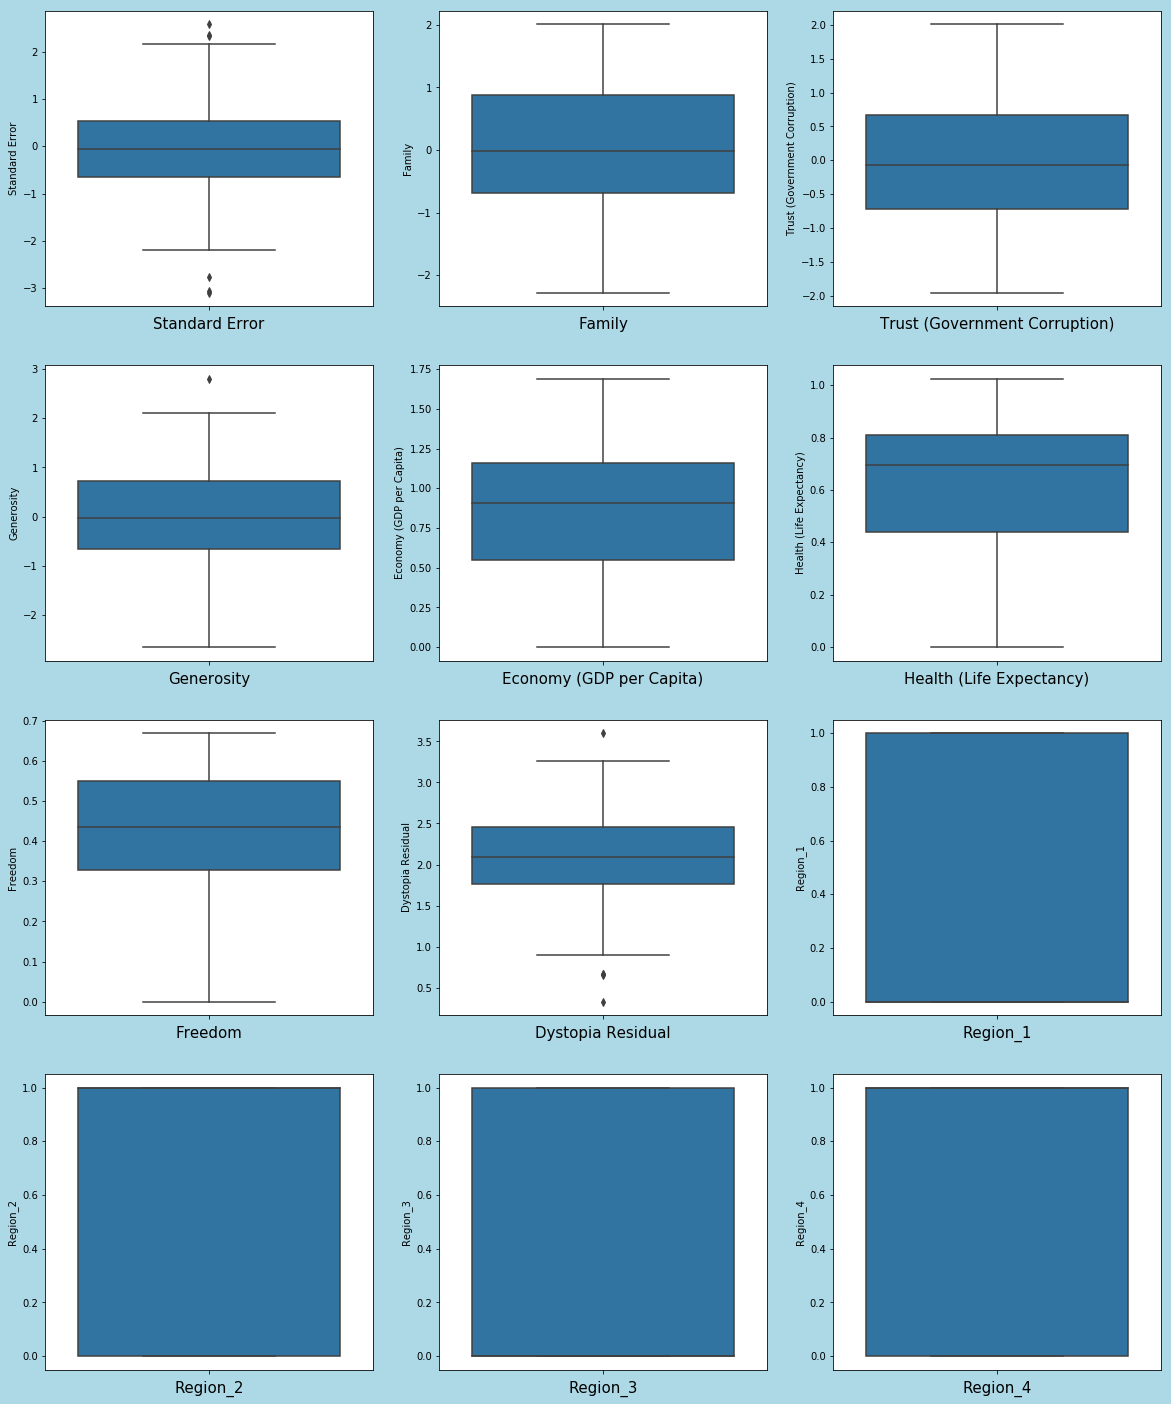

In [23]:
plt.figure(figsize = (20,25), facecolor = 'lightblue')
plotnumber = 1
for i in x:
    if plotnumber <= 12:
        ac = plt.subplot(4,3,plotnumber)
        sns.boxplot(x[i],orient = 'v')
        plt.xlabel(i, fontsize = 15)
    plotnumber+=1
plt.show()

#### Here I can see outliers in Dystopia Residual, Generosity and Standard Error

In [24]:
data2 = data1
from scipy import stats
z = np.abs(stats.zscore(x))
print(z)

[[0.9722262  1.66920633 1.7739906  ... 1.01273937 0.6704784  0.62126074]
 [0.30934971 2.01213244 0.31599326 ... 1.01273937 0.6704784  0.62126074]
 [1.06201663 1.73958573 1.90679206 ... 1.01273937 0.6704784  0.62126074]
 ...
 [0.39913743 1.69066357 0.73891461 ... 0.98742088 0.6704784  1.60963011]
 [1.92690191 1.79680304 0.15194623 ... 1.01273937 0.6704784  0.62126074]
 [1.31032295 2.16039658 0.06732622 ... 1.01273937 0.6704784  0.62126074]]


In [25]:
index = np.where(z>2.8)[0]
df = x.drop(x.index[index])
df.shape

(153, 12)

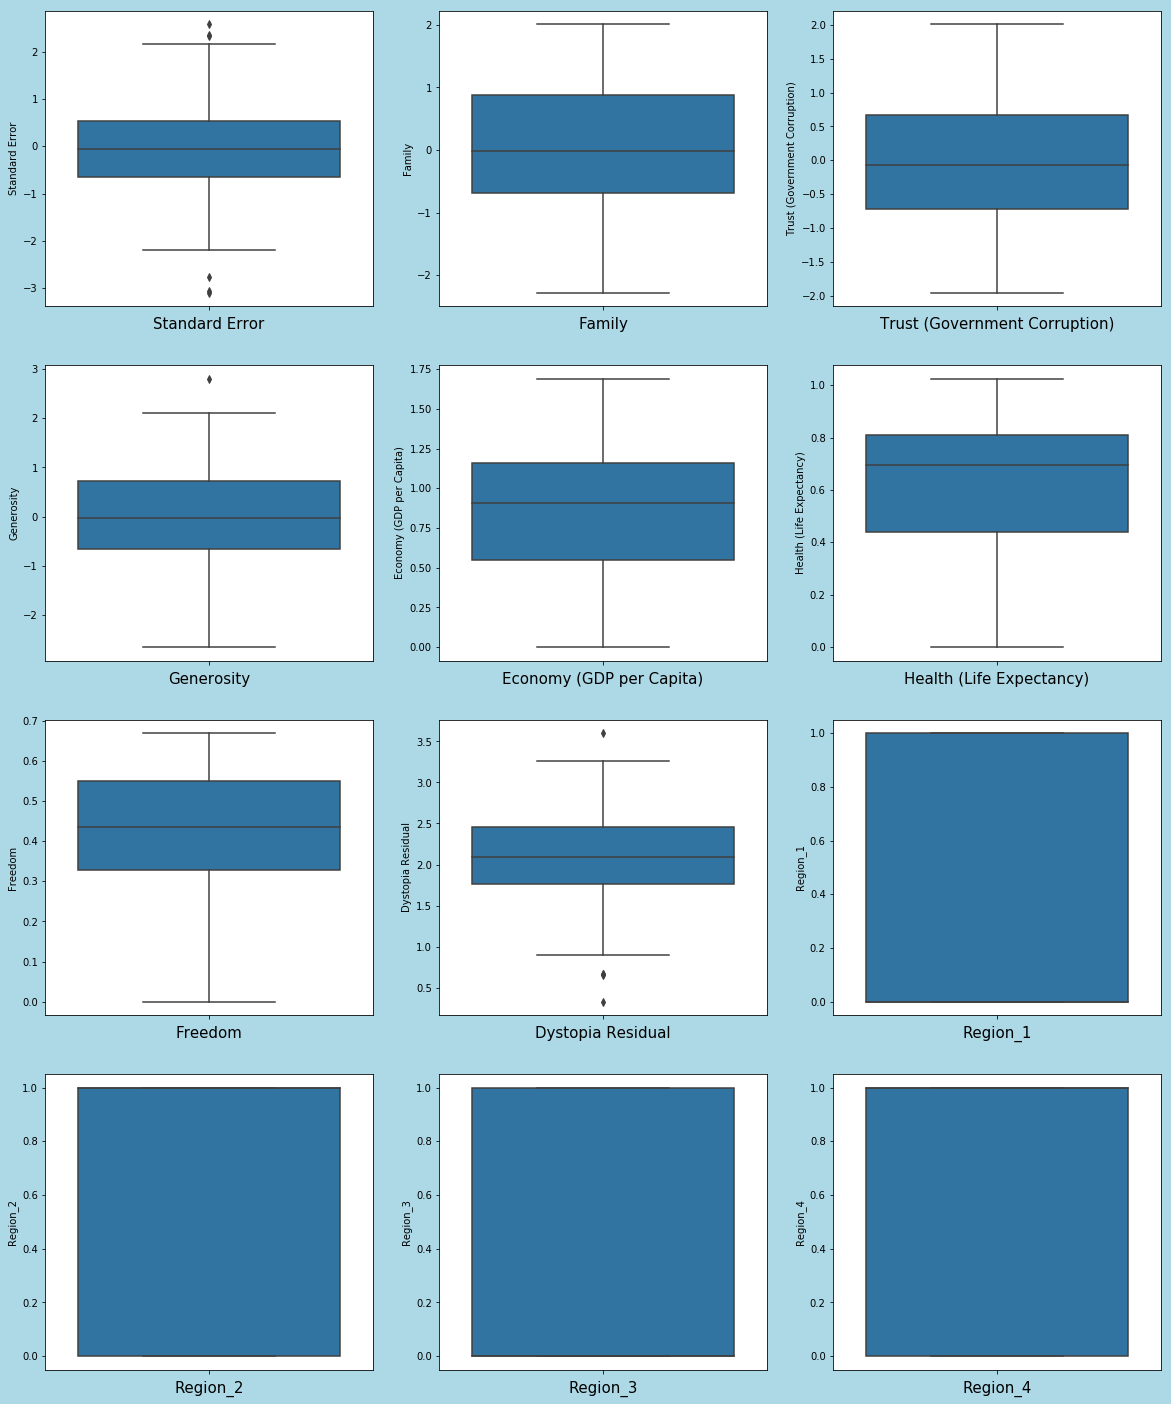

In [26]:
plt.figure(figsize = (20,25), facecolor = 'lightblue')
plotnumber = 1
for i in x:
    if plotnumber <= 13:
        ac = plt.subplot(4,3,plotnumber)
        sns.boxplot(x[i],orient = 'v')
        plt.xlabel(i, fontsize = 15)
    plotnumber+=1
plt.show()

#### The outliers in the model are negligible hence I'm not removing outliers any more as We'll lose data

#### Finding the best Random state to split the data

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
acc = 0
rs = 0

for i in range(1,251):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train,y_train)
    y_pred = lin_reg.predict(x_test)
    mod_acc = np.sqrt(mean_squared_error(y_test,y_pred))
    if mod_acc> acc:
        acc = mod_acc
        rs = i
rs

100

#### Splittin the data with best Random State and Fitting model 1

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = rs)
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

In [29]:
lin_reg.score(x_train,y_train)

0.9973743142618835

In [30]:
li_sc = lin_reg.score(x_test,y_test)

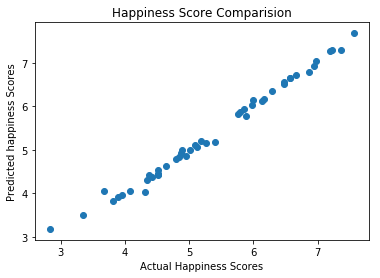

In [31]:
## Visualizing the data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Scores')
plt.ylabel ('Predicted happiness Scores')
plt.title('Happiness Score Comparision')
plt.show()

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(' Mean Squared Error for the Model is', rmse)

 Mean Squared Error for the Model is 0.11131353385644306


#### Model 2 I'm using Decisoin Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dtr =  DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dt_pred = dtr.predict(x_test)
dt_sc = dtr.score(x_test,y_test)
dt_sc

0.6773678386470692

In [35]:
rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rmse

### Looks like there is a lot of error in the Decision Tree Regressor

0.6578331697069301

#### Model 3 I'm using Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [37]:
rfr.fit(x_train,y_train)
rf_pred = rfr.predict(x_test)
rf_sc = rfr.score(x_test, y_test)
rf_sc

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8527120218048196

In [38]:
rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
rmse

0.4444732099632102

#### Found out there is a better RMSE for Random Forest than Decision Tree

In [39]:
## using XG boost for this regression
import xgboost as xgb
xgb = xgb.XGBRegressor()

In [40]:
xgb.fit(x_train,y_train)
xg_pred = xgb.predict(x_test)
xg_sc = xgb.score(x_test,y_test)
xg_sc

0.8908535078520018

In [41]:
rmse = np.sqrt(mean_squared_error(y_test,xg_pred))
rmse

0.3826192626788627

#### Cross Validation scores for the models

In [42]:
from sklearn.model_selection import cross_val_score

mod1 = cross_val_score(lin_reg,x,y,cv = 5).mean()
mod2 = cross_val_score(dtr,x,y, cv = 5).mean()
mod3 = cross_val_score(rfr,x,y,cv = 5).mean()
mod4 = cross_val_score(xgb,x,y,cv =5).mean()
print(mod1,mod2,mod3,mod4)

0.8821850190174579 -6.8968976358628895 -4.045569009143678 -3.1505686902367236


#### Comparing actual model scores and cross validation scores, I can see that linear regression is the best fit hence using regularization and I choose ridge

In [43]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import GridSearchCV

params = {'normalize' :[True,False],
             'gcv_mode' : ['auto', 'svd', 'eigen']}

In [44]:
gcv = GridSearchCV(RidgeCV(),params)

In [45]:
gcv.fit(x_train,y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False], 'gcv_mode': ['auto', 'svd', 'eigen']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
gcv.best_params_

{'gcv_mode': 'auto', 'normalize': False}

In [47]:
rcv = RidgeCV(alphas = np.arange(0.000001,0.001,0.00001), gcv_mode = 'auto', normalize = False)

In [48]:
rcv.fit(x_train,y_train)

RidgeCV(alphas=array([1.00e-06, 1.10e-05, ..., 9.81e-04, 9.91e-04]), cv=None,
    fit_intercept=True, gcv_mode='auto', normalize=False, scoring=None,
    store_cv_values=False)

In [49]:
alpha = rcv.alpha_
ridge = Ridge(alpha)
ridge.fit(x_train,y_train)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
rg_pred = ridge.predict(x_test)

In [51]:
ridge.score(x_test,y_test)

0.9907621382689674

In [52]:
rmse = np.sqrt(mean_squared_error(y_test,rg_pred))
rmse

0.11131345633695897

#### The scores didn't Improve.Therefore considering thr Linear Regression is the best model